In [1]:
import pandas  as pd
import seaborn as sns
import numpy   as np
import matplotlib.pyplot as plt
import missingno as msno 

In [2]:
Med_treatments = pd.read_excel('./data/Medicamentos.xlsx')

# MEDICAL TREATMENTS (MEDICAMENTOS)

Comprises information regarding the per-patient historical dosage of medicines such as Omalizumab. According to the particular condition of each patient there might be data about daily to monthly dosages.

In [3]:
print('Shape', Med_treatments.shape)
print(Med_treatments.columns)
print(Med_treatments.info())

Shape (109596, 8)
Index(['Id', 'Fecha_Emision', 'Regional_EPS_Desc', 'Codigo_Prestacion_Op',
       'Descripcion_Prestacion', 'Codigo_Diagnostico_EPS_Op',
       'Diagnostico_EPS_Desc', 'Numero_Cantidad_Prestaciones'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109596 entries, 0 to 109595
Data columns (total 8 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   Id                            109596 non-null  int64         
 1   Fecha_Emision                 109596 non-null  datetime64[ns]
 2   Regional_EPS_Desc             109596 non-null  object        
 3   Codigo_Prestacion_Op          109596 non-null  object        
 4   Descripcion_Prestacion        109596 non-null  object        
 5   Codigo_Diagnostico_EPS_Op     109596 non-null  object        
 6   Diagnostico_EPS_Desc          109596 non-null  object        
 7   Numero_Cantidad_Prestaciones  108343 non-

In [4]:
Med_treatments.rename(columns={'Id':'id_paciente', 'Fecha_Emision':'fecha_emision', 'Regional_EPS_Desc':'regionalEPS',
                                'Codigo_Prestacion_Op':'codigo_prestacion',
                               'Descripcion_Prestacion':'descripcion_prestacion', 
                               'Codigo_Diagnostico_EPS_Op':'codigodiagnostico',
                                'Diagnostico_EPS_Desc':'diagnostico', 
                               'Numero_Cantidad_Prestaciones':'cantidad_prestaciones'}, inplace=True)

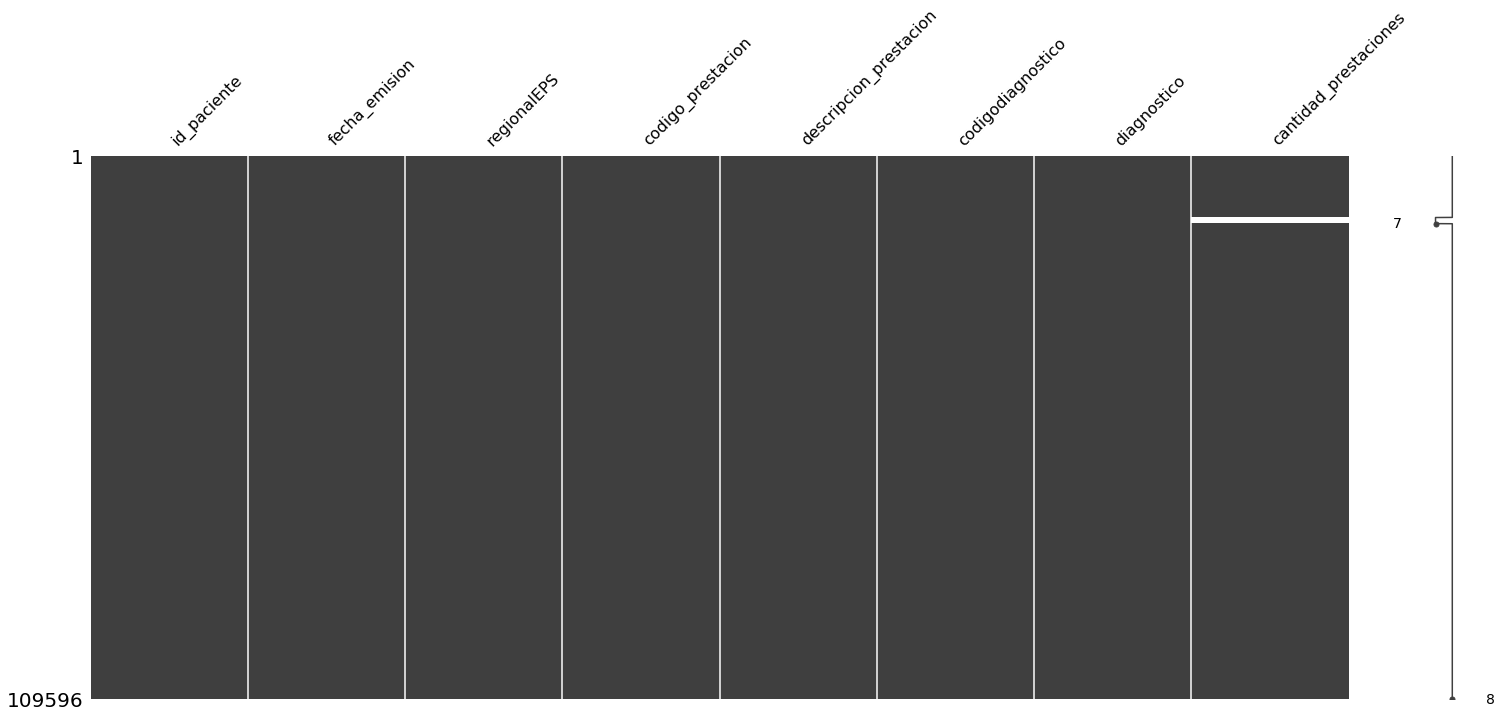

In [5]:
msno.matrix(Med_treatments) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35523 entries, 9 to 109583
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id_paciente             35523 non-null  int64         
 1   fecha_emision           35523 non-null  datetime64[ns]
 2   regionalEPS             35523 non-null  object        
 3   codigo_prestacion       35523 non-null  object        
 4   descripcion_prestacion  35523 non-null  object        
 5   codigodiagnostico       35523 non-null  object        
 6   diagnostico             35523 non-null  object        
 7   cantidad_prestaciones   35009 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 2.4+ MB
None


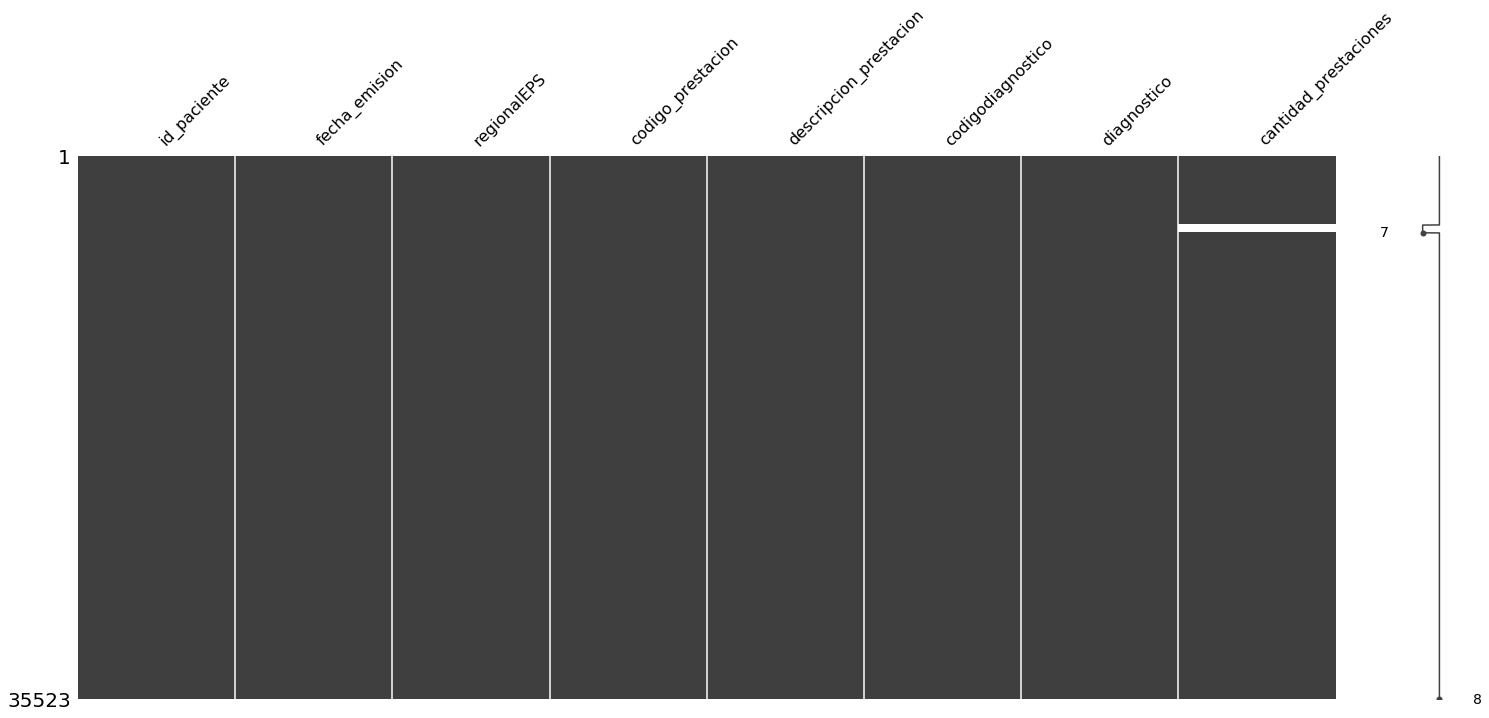

In [6]:
#Filtrado para obtener solo pacientes con diagnostico de asma
Med_treatments1= Med_treatments[Med_treatments['diagnostico'].str.contains('ASMA')]
print(Med_treatments1.info())
msno.matrix(Med_treatments1) 

In [7]:
# No se encuentran prescripciones menores de creo, no obstante aún hay valores nulos correspondientes a 1 semana del 
# 21 de enero hasta el 27 de enero de 2020, los dejamos porque queremos establecer frecuencia en entrega de medicamentos
# aún cuando la dosis no se encuentre reflejada, asumimos 
(Med_treatments1['cantidad_prestaciones'] < 0).sum()

0

In [8]:
b=Med_treatments1[Med_treatments1.isna().any(axis=1)]
b.sort_values(by='fecha_emision')

,id_paciente,fecha_emision,regionalEPS,codigo_prestacion,descripcion_prestacion,codigodiagnostico,diagnostico,cantidad_prestaciones
12822,1194113,2020-01-20,Medellin,M021479,FLUTICASONA PROPIONATO/SALMETEROL,J450,ASMA PREDOMINANTEMENTE ALÉRGICA,NaN
12987,914977,2020-01-20,Manizales,M029140,OMALIZUMAB,J450,ASMA PREDOMINANTEMENTE ALÉRGICA,NaN
12982,1455167,2020-01-20,Medellin,M029257,FUROATO DE FLUTICASONA MICRONIZADO/RIFENATATO ...,J450,ASMA PREDOMINANTEMENTE ALÉRGICA,NaN
12941,752567,2020-01-20,Medellin,M028975,MONTELUKAST SÓDICO-INDICACIONES DIFERENTES RES...,J459,"ASMA, NO ESPECIFICADA",NaN
12592,1868633,2020-01-20,Bogota,M023618,BROMURO DE TIOTROPIO,J459,"ASMA, NO ESPECIFICADA",NaN
...,...,...,...,...,...,...,...,...
12806,1359725,2020-01-27,Medellin,M021370,BUDESONIDA/FORMOTEROL FUMARATO,J459,"ASMA, NO ESPECIFICADA",NaN
13709,605968,2020-01-27,Medellin,M028685,RUPATADINA,J450,ASMA PREDOMINANTEMENTE ALÉRGICA,NaN
12731,1899311,2020-01-27,Medellin,M021370,BUDESONIDA/FORMOTEROL FUMARATO,J450,ASMA PREDOMINANTEMENTE ALÉRGICA,NaN
13569,1007665,2020-01-27,Medellin,M028975,MONTELUKAST SÓDICO-INDICACIONES DIFERENTES RES...,J450,ASMA PREDOMINANTEMENTE ALÉRGICA,NaN


In [9]:

print(len(Med_treatments1.diagnostico.unique()))
Med_treatments1.diagnostico.unique()

13


array(['ASMA PREDOMINANTEMENTE ALÉRGICA', 'ASMA, NO ESPECIFICADA',
       'ASMA MIXTA', 'NEUMONÍA DEBIDA A MYCOPLASMA PNEUMONIAE',
       'ASMA NO ALÉRGICA', 'ASMA', 'ASMA PREDOMINANTEMENTE AL?RGICA',
       'INFECCIÓN POR MICOPLASMA, SIN OTRA ESPECIFICACIÓN',
       'BRONQUITIS AGUDA DEBIDA A MYCOPLASMA PNEUMONIAE',
       'ASMA NO AL?RGICA', 'NEUMON?A DEBIDA A MYCOPLASMA PNEUMONIAE',
       'MYCOPLASMA PNEUMONIAE [M. PNEUMONIAE] COMO CAUSA DE ENFERMEDADES CLASIFICADAS EN OTROS CAPÍTULOS',
       'CLOASMA'], dtype=object)

In [10]:
Med_treatments1[Med_treatments1.duplicated('id_paciente')]
Med_treatments1[Med_treatments1['id_paciente']== 652857].head()

,id_paciente,fecha_emision,regionalEPS,codigo_prestacion,descripcion_prestacion,codigodiagnostico,diagnostico,cantidad_prestaciones
37,652857,2020-02-27,Medellin,M283107,MONTELUKAST MONOSODICO (0-18AÑOS),J459,"ASMA, NO ESPECIFICADA",30.0
48,652857,2020-02-27,Medellin,M021479,FLUTICASONA PROPIONATO/SALMETEROL,J450,ASMA PREDOMINANTEMENTE ALÉRGICA,1.0
729,652857,2020-02-27,Medellin,M029656,FEXOFENADINA,J450,ASMA PREDOMINANTEMENTE ALÉRGICA,30.0
2160,652857,2020-03-05,Medellin,M029140,OMALIZUMAB,J450,ASMA PREDOMINANTEMENTE ALÉRGICA,3.0
2933,652857,2020-03-16,Medellin,M014029,SALBUTAMOL SULFATO,J450,ASMA PREDOMINANTEMENTE ALÉRGICA,2.0


In [11]:
Med_treatments1.sort_values(by=('fecha_emision'))

,id_paciente,fecha_emision,regionalEPS,codigo_prestacion,descripcion_prestacion,codigodiagnostico,diagnostico,cantidad_prestaciones
19676,885255,2016-12-01,Medellin,M024368,BUDESONIDA/FUMARATO DE FORMOTEROL,J459,"ASMA, NO ESPECIFICADA",1.0
19958,622031,2016-12-01,Medellin,M021755,OMALIZUMAB,J450,ASMA PREDOMINANTEMENTE AL?RGICA,2.0
21037,833416,2016-12-01,Medellin,M021755,OMALIZUMAB,J450,ASMA PREDOMINANTEMENTE AL?RGICA,3.0
21326,1304391,2016-12-01,Medellin,M021370,BUDESONIDA/FORMOTEROL FUMARATO,J459,"ASMA, NO ESPECIFICADA",3.0
21823,1233893,2016-12-01,Medellin,M021755,OMALIZUMAB,J450,ASMA PREDOMINANTEMENTE AL?RGICA,2.0
...,...,...,...,...,...,...,...,...
19037,880573,2020-05-18,Medellin,M007081,CLONIDINA,J450,ASMA PREDOMINANTEMENTE ALÉRGICA,30.0
19327,556585,2020-05-18,Medellin,M021479,FLUTICASONA PROPIONATO/SALMETEROL,J450,ASMA PREDOMINANTEMENTE ALÉRGICA,1.0
19264,1455167,2020-05-18,Medellin,M021651,FUROATO DE MOMETASONA MONOHIDRATO,J450,ASMA PREDOMINANTEMENTE ALÉRGICA,1.0
18856,880573,2020-05-18,Medellin,M008079,LOVASTATINA,J450,ASMA PREDOMINANTEMENTE ALÉRGICA,30.0


In [12]:
Med_treatments2=Med_treatments1.astype({'id_paciente':str})
biologicos=['MALIZUMAB', 'BENRALIZUMAB', 'MEPOLIZUMAB', 'DUPILUMAB']
Med_treatments2[Med_treatments2['descripcion_prestacion'].isin(biologicos)].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 697 entries, 51 to 105490
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id_paciente             697 non-null    object        
 1   fecha_emision           697 non-null    datetime64[ns]
 2   regionalEPS             697 non-null    object        
 3   codigo_prestacion       697 non-null    object        
 4   descripcion_prestacion  697 non-null    object        
 5   codigodiagnostico       697 non-null    object        
 6   diagnostico             697 non-null    object        
 7   cantidad_prestaciones   672 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 49.0+ KB


In [13]:
print(len(Med_treatments2['id_paciente'].unique()))
Med_treatments2.describe(include='all')

859


,id_paciente,fecha_emision,regionalEPS,codigo_prestacion,descripcion_prestacion,codigodiagnostico,diagnostico,cantidad_prestaciones
count,35523,35523,35523,35523,35523,35523,35523,35009.000000
unique,859,1086,6,455,334,10,13,NaN
top,1427481,2020-01-24 00:00:00,Medellin,M029140,OMALIZUMAB,J450,ASMA PREDOMINANTEMENTE ALÉRGICA,NaN
freq,291,254,31774,5336,9623,22618,21149,NaN
first,NaN,2016-12-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2020-05-18 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.567740
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.203971
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000


In [14]:
Med_treatments2.groupby(['id_paciente']).count().sort_values(by='fecha_emision', ascending=False)

,fecha_emision,regionalEPS,codigo_prestacion,descripcion_prestacion,codigodiagnostico,diagnostico,cantidad_prestaciones
id_paciente,,,,,,,
1427481,291,291,291,291,291,291,291
1463545,272,272,272,272,272,272,267
1629016,272,272,272,272,272,272,271
1495562,241,241,241,241,241,241,240
1240215,223,223,223,223,223,223,219
...,...,...,...,...,...,...,...
1007445947,1,1,1,1,1,1,1
21430512,1,1,1,1,1,1,1
21447094,1,1,1,1,1,1,1


In [15]:
Med_treatments2['yyyy'] = pd.to_datetime(Med_treatments2['fecha_emision']).dt.strftime('%Y')
Med3 = Med_treatments2.sort_values(by='yyyy', ascending=True)
Med3

,id_paciente,fecha_emision,regionalEPS,codigo_prestacion,descripcion_prestacion,codigodiagnostico,diagnostico,cantidad_prestaciones,yyyy
19628,737722,2016-12-06,Medellin,M021755,OMALIZUMAB,J45,ASMA,3.0,2016
21308,1650612,2016-12-27,Medellin,M114062,BROMURO DE IPRATROPIO,J459,"ASMA, NO ESPECIFICADA",1.0,2016
21309,1650612,2016-12-29,Medellin,M019569,MONTELUKAST S?DICO,J450,ASMA PREDOMINANTEMENTE AL?RGICA,90.0,2016
21310,1650612,2016-12-29,Medellin,M021755,OMALIZUMAB,J450,ASMA PREDOMINANTEMENTE AL?RGICA,2.0,2016
21326,1304391,2016-12-01,Medellin,M021370,BUDESONIDA/FORMOTEROL FUMARATO,J459,"ASMA, NO ESPECIFICADA",3.0,2016
...,...,...,...,...,...,...,...,...,...
13437,982570,2020-01-21,Medellin,M023618,BROMURO DE TIOTROPIO,J459,"ASMA, NO ESPECIFICADA",NaN,2020
13438,1076037,2020-01-23,Medellin,M023618,BROMURO DE TIOTROPIO,J459,"ASMA, NO ESPECIFICADA",NaN,2020
13439,629496,2020-01-24,Medellin,M028975,MONTELUKAST SÓDICO-INDICACIONES DIFERENTES RES...,J450,ASMA PREDOMINANTEMENTE ALÉRGICA,NaN,2020
13442,1366597,2020-01-22,Medellin,M008005,GEL FLUIDO DE HIDROXIDO DE MAGNESIO/GEL FLUIDO...,J459,"ASMA, NO ESPECIFICADA",NaN,2020


Año: 2016 Pacientes: 254
Año: 2017 Pacientes: 697
Año: 2018 Pacientes: 517
Año: 2019 Pacientes: 515
Año: 2020 Pacientes: 481


Text(0.5, 1.0, 'Patients per year given asthma medications ')

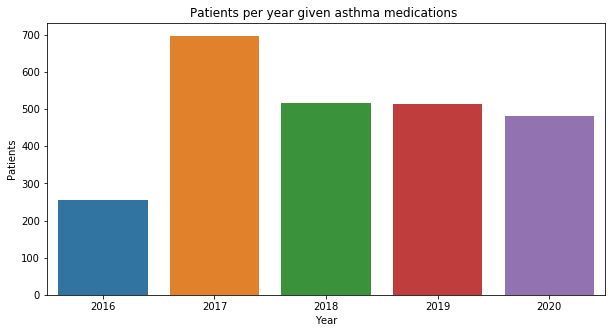

In [16]:
año=[]
pacientes=[]

for i in Med3['yyyy'].unique():
    tdf = Med3[Med3['yyyy']==i]
    tdf = tdf.groupby('id_paciente').count().reset_index()
    print('Año:', i, 'Pacientes:',len(tdf['id_paciente'].unique()))
    año.append(i)
    pacientes.append(len(tdf['id_paciente'].unique()))
    
plt.figure(figsize=(10,5))
sns.barplot(x=año, y=pacientes)
plt.xlabel('Year')
plt.ylabel('Patients')
plt.title('Patients per year given asthma medications ')

Text(0.5, 1.0, 'Asthma diagnosed people given per city')

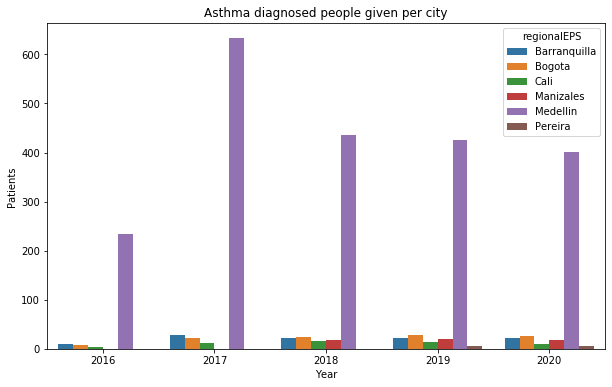

In [17]:
med4=Med3.groupby(['id_paciente', 'yyyy','regionalEPS']).count().reset_index()
med5=med4.groupby(['regionalEPS','yyyy']).agg({'id_paciente':'count'}).reset_index()
med5
plt.figure(figsize=(10,6))
sns.barplot(x='yyyy', y='id_paciente', hue='regionalEPS', data=med5)
plt.xlabel('Year')
plt.ylabel('Patients')
plt.title('Asthma diagnosed people given per city')

In [18]:
main_med = Med3['descripcion_prestacion'].value_counts()[:20]
Med3[Med3['descripcion_prestacion'].isin(main_med)]

,id_paciente,fecha_emision,regionalEPS,codigo_prestacion,descripcion_prestacion,codigodiagnostico,diagnostico,cantidad_prestaciones,yyyy


In [19]:
Med_treatments2.columns

Index(['id_paciente', 'fecha_emision', 'regionalEPS', 'codigo_prestacion',
       'descripcion_prestacion', 'codigodiagnostico', 'diagnostico',
       'cantidad_prestaciones', 'yyyy'],
      dtype='object')

In [20]:
Med_treatments2.rename(columns={'id_paciente':'id_patient', 'fecha_emision':'released_date', 'regionalEPS':'regional_EPS',
                                'codigo_prestacion':'medicine_code','descripcion_prestacion':'medicine_name',
                                'codigodiagnostico':'diagnosis_code', 'diagnostico':'diagnosis','cantidad_prestaciones':'quantity',
                                'yyyy':'year'}, inplace=True)

In [21]:
Med_treatments3 = Med_treatments2.drop(columns='year')
Med_treatments3.dropna()

,id_patient,released_date,regional_EPS,medicine_code,medicine_name,diagnosis_code,diagnosis,quantity
9,1106183,2020-02-28,Barranquilla,M028977,MONTELUKAST MONOSODICO-INDICACIONES DIFERENTES...,J450,ASMA PREDOMINANTEMENTE ALÉRGICA,30.0
10,1801732,2020-02-28,Medellin,M021370,BUDESONIDA/FORMOTEROL FUMARATO,J459,"ASMA, NO ESPECIFICADA",1.0
11,1441800,2020-02-29,Medellin,M026347,FLUTICASONA PROPIONATO/SALMETEROL,J450,ASMA PREDOMINANTEMENTE ALÉRGICA,1.0
13,1916799,2020-02-29,Medellin,M021370,BUDESONIDA/FORMOTEROL FUMARATO,J450,ASMA PREDOMINANTEMENTE ALÉRGICA,1.0
14,1356429,2020-02-24,Medellin,M029140,OMALIZUMAB,J450,ASMA PREDOMINANTEMENTE ALÉRGICA,2.0
...,...,...,...,...,...,...,...,...
109535,1769865,2019-09-11,Medellin,M024093,BROMURO DE TIOTROPIO,J459,"ASMA, NO ESPECIFICADA",120.0
109536,1427481,2019-04-04,Medellin,M016137,ACETAMINOFEN,J450,ASMA PREDOMINANTEMENTE ALÉRGICA,120.0
109539,1240215,2019-08-26,Medellin,M080930,AGUJAS PARA APLICACION DE INSULINA POR SISTEMA...,J459,"ASMA, NO ESPECIFICADA",120.0
109553,850509,2019-12-10,Cali,M009032,PREDNISOLONA,J450,ASMA PREDOMINANTEMENTE ALÉRGICA,150.0


In [22]:
Med_treatments3[9600:9609]

,id_patient,released_date,regional_EPS,medicine_code,medicine_name,diagnosis_code,diagnosis,quantity
28196,1214740830,2017-06-27,Medellin,M020388,VACUNA NEUMOCOCO -INDICACIONES DISTINTAS AL AC...,J450,ASMA PREDOMINANTEMENTE ALÉRGICA,1.0
28203,97072207894,2017-06-07,Medellin,M020105,SALMETEROL/FLUTICASONA PROPIONATO,J450,ASMA PREDOMINANTEMENTE ALÉRGICA,1.0
28204,99052806573,2017-06-09,Medellin,M021755,OMALIZUMAB,J459,"ASMA, NO ESPECIFICADA",4.0
28205,99052806573,2017-06-28,Medellin,M021755,OMALIZUMAB,J459,"ASMA, NO ESPECIFICADA",4.0
28218,1828862,2017-07-12,Medellin,M021755,OMALIZUMAB,J450,ASMA PREDOMINANTEMENTE ALÉRGICA,4.0
28219,1828862,2017-07-25,Medellin,M021755,OMALIZUMAB,J450,ASMA PREDOMINANTEMENTE ALÉRGICA,4.0
28220,682268,2017-07-01,Medellin,M021370,BUDESONIDA/FORMOTEROL FUMARATO,J450,ASMA PREDOMINANTEMENTE ALÉRGICA,3.0
28221,682268,2017-07-01,Medellin,M021755,OMALIZUMAB,J450,ASMA PREDOMINANTEMENTE ALÉRGICA,4.0
28222,682268,2017-07-21,Medellin,M021755,OMALIZUMAB,J450,ASMA PREDOMINANTEMENTE ALÉRGICA,4.0


In [23]:
#Med_treatments3.to_csv('./data/cleansed/Med_treats.csv', sep='|', index=False)

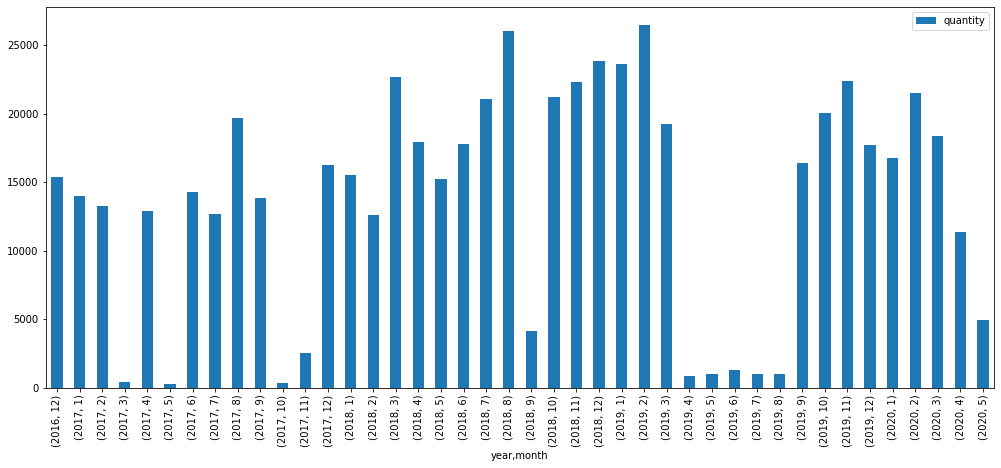

In [24]:
Med_treatments3['year'] = Med_treatments3['released_date'].dt.year
Med_treatments3['month'] = Med_treatments3['released_date'].dt.month
Med_treatments3.groupby(['year','month']).agg({'quantity':'sum'}).plot(kind='bar', figsize=(17,7))

Text(0.5, 1, 'Dosis Medicines')

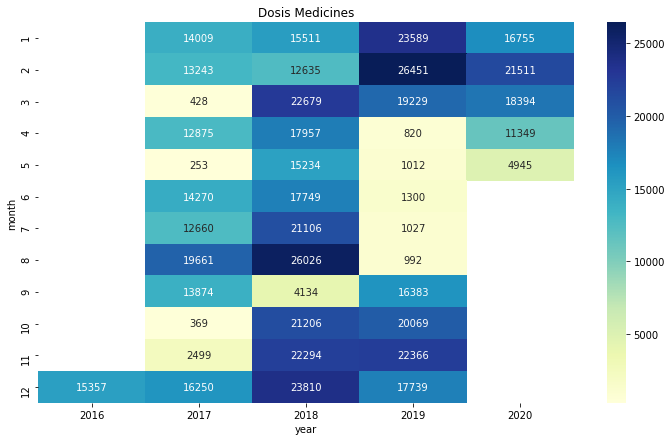

In [25]:
coll_pivot = pd.pivot_table(Med_treatments3, values='quantity', index='month', columns='year', aggfunc='sum')
fig, ax = plt.subplots(figsize=(12,7))
sns.heatmap(coll_pivot, ax=ax, annot=True, fmt=".0f", cmap="YlGnBu")
ax.set_title('Dosis Medicines')

In [26]:
med_df = Med_treatments3.copy()

Text(0.5, 1, 'Dosis OMALIZUMAB')

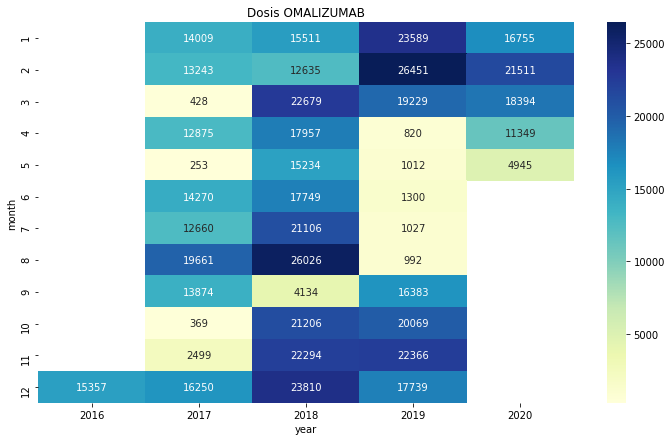

In [27]:
med_df1 = med_df[med_df.medicine_code=='M029140']
coll_pivot2 = pd.pivot_table(med_df, values='quantity', index='month', columns='year', aggfunc='sum')
fig, ax = plt.subplots(figsize=(12,7))
sns.heatmap(coll_pivot2, ax=ax, annot=True, fmt=".0f", cmap="YlGnBu")
ax.set_title('Dosis OMALIZUMAB')

Text(0.5, 1, 'Records')

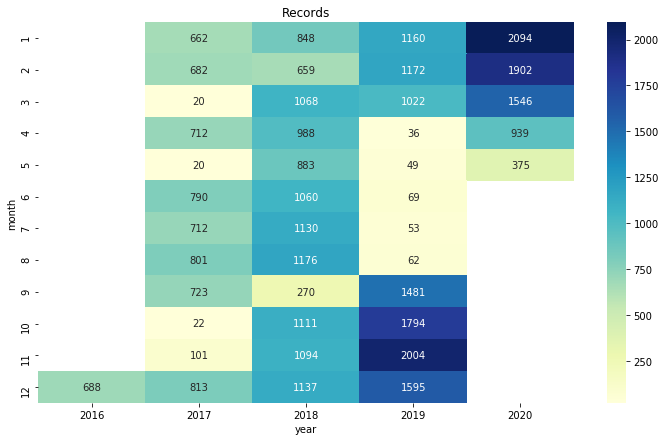

In [28]:
coll_pivot2 = pd.pivot_table(med_df, values='id_patient', index='month', columns='year', aggfunc='count')
fig, ax = plt.subplots(figsize=(12,7))
sns.heatmap(coll_pivot2, ax=ax, annot=True, fmt=".0f", cmap="YlGnBu")
ax.set_title('Records')

In [29]:
med_df3=med_df.groupby(['id_patient','year','month']).agg({'quantity':'sum'}).reset_index()
med_df3

,id_patient,year,month,quantity
0,1000084257,2017,6,3.0
1,1000409250,2017,6,180.0
2,1000417227,2017,6,8.0
3,1000534745,2017,6,8.0
4,1000566529,2017,6,10.0
...,...,...,...,...
11410,998153,2020,1,33.0
11411,998153,2020,2,35.0
11412,998153,2020,3,2.0
11413,998153,2020,4,33.0


Text(0.5, 1, 'Patients in treatment')

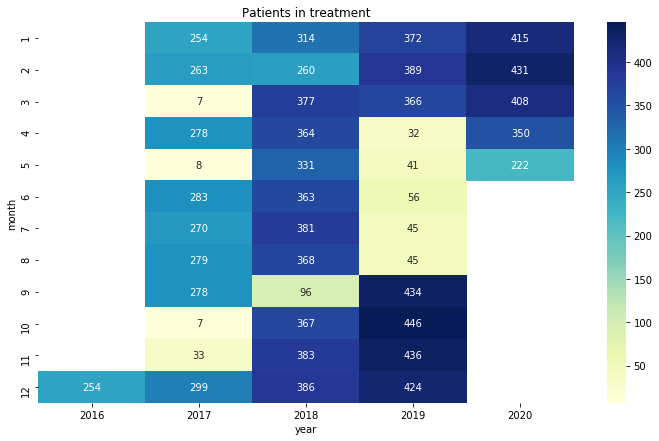

In [30]:
med_pivot_id2 = pd.pivot_table(med_df3, values='id_patient', index='month', columns='year', aggfunc='count')
fig, ax = plt.subplots(figsize=(12,7))
sns.heatmap(med_pivot_id2, ax=ax, annot=True, fmt=".0f", cmap="YlGnBu")
ax.set_title('Patients in treatment')

In [39]:
biologicals = ['OMALIZUMAB', 'BENRALIZUMAB', 'MEPOLIZUMAB', 'DUPILUMAB']
med_bio = Med_treatments3[Med_treatments3.medicine_name.isin(biologicals)]
med_bio.medicine_code.unique()

array(['M029140', 'M029751', 'M029551', 'M029157', 'M029631', 'M021755'],
      dtype=object)

Text(0.5, 1, 'Patients in treatment')

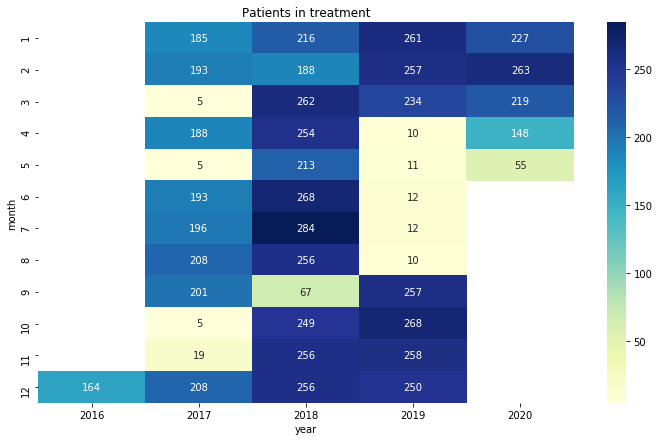

In [33]:
med_bio1=med_bio.groupby(['id_patient','year','month']).agg({'quantity':'sum'}).reset_index()
med_pivot_id3 = pd.pivot_table(med_bio1, values='id_patient', index='month', columns='year', aggfunc='count')
fig, ax = plt.subplots(figsize=(12,7))
sns.heatmap(med_pivot_id3, ax=ax, annot=True, fmt=".0f", cmap="YlGnBu")
ax.set_title('Patients in treatment')

Text(0.5, 1, 'Records')

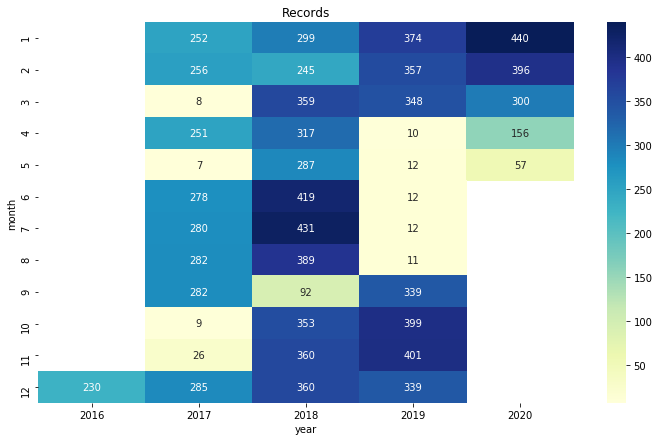

In [34]:
coll_pivot4 = pd.pivot_table(med_bio, values='id_patient', index='month', columns='year', aggfunc='count')
fig, ax = plt.subplots(figsize=(12,7))
sns.heatmap(coll_pivot4, ax=ax, annot=True, fmt=".0f", cmap="YlGnBu")
ax.set_title('Records')

Text(0.5, 1, 'Dosis biologicos')

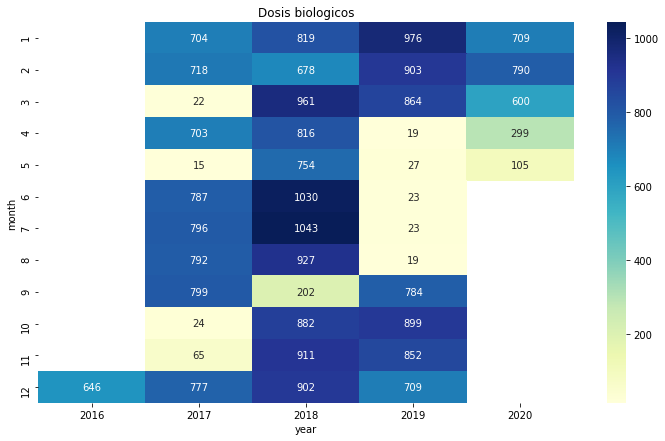

In [35]:
coll_pivot5 = pd.pivot_table(med_bio, values='quantity', index='month', columns='year', aggfunc='sum')
fig, ax = plt.subplots(figsize=(12,7))
sns.heatmap(coll_pivot5, ax=ax, annot=True, fmt=".0f", cmap="YlGnBu")
ax.set_title('Dosis biologicos')